# **Handwritten Digit Recognition**
**Problem Statement:**
The goal of this project is to create a model that will be able to recognize and determine the handwritten digits from its image by using ML/DL techniques and observe the performance difference between various techniques.
We use MNIST dataset for this task.

# **MNIST Dataset :**
The MNIST dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classification problem.

The dataset was constructed from a number of scanned document dataset available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset. Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required.

Each image is a 28 by 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it.

In [1]:
#Importing required library

import torch
import numpy as np
from matplotlib import pyplot as plt
import torchvision
from torchvision import transforms
from torchvision.datasets import MNIST
import torch.nn as nn
import torch.nn.functional as F

print("All libraries are loaded")

All libraries are loaded


In [3]:
!tar -xvf /content/MNIST.tar.gz

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/train-images-idx3-ubyte.gz
MNIST/processed/
MNIST/processed/training.pt
MNIST/processed/test.pt


In [5]:
# how many samples per batch to load
batch_size = 20

# convert data to torch.FloatTensor
transform = transforms.ToTensor()
train_data = MNIST(root = './', train=True, download=True, transform=transform)

In [6]:
print(len(train_data))

60000


In [7]:
test_data = MNIST(root = './', train=False, download=True, transform=transform)

In [8]:
train_data, val_data = torch.utils.data.random_split(train_data, [50000, 10000])

# **Data Loader**

torch.utils.data.DataLoader in PyTorch is a utility class that provides an efficient way to load and iterate over datasets during the training or evaluation of machine learning models. It enables batching, shuffling, and parallel data loading, which are essential for training deep learning models effectively.

The main features of DataLoader include:

**Batching:**It allows loading data in batches, where each batch contains a fixed number of samples. Batching helps in processing multiple samples in parallel, which can improve the efficiency of training.

**Shuffling:** It shuffles the data after each epoch, ensuring that the model sees the data in a different order during each epoch. Shuffling helps prevent the model from memorizing the order of the data and improves generalization.

**Parallel** Data Loading: It supports loading data in parallel using multiple CPU cores. This can significantly speed up data loading, especially when dealing with large datasets or complex data transformations.

**Iterating** Over Batches: It provides an iterator interface for iterating over batches of data. Each batch returned by the DataLoader is typically a tuple containing input data and corresponding target labels (if available).

Overall, DataLoader simplifies the process of handling datasets in PyTorch by providing a flexible and efficient interface for loading and processing data. It is widely used in various deep learning applications for managing training and evaluation data.








In [10]:
# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
print("Training data created")
print("Train-Data length : ", len(train_data))

val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
print("Validation data created")
print("Validation-Data length : ", len(val_data))

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)
print("Test data created")
print("Test-Data length : ", len(test_data))

Training data created
Train-Data length :  50000
Validation data created
Validation-Data length :  10000
Test data created
Test-Data length :  10000


# **iter()**

In PyTorch, the iter() function is used to create an iterator from an iterable object, such as a DataLoader. When you call iter(train_loader), it creates an iterator object dataiter from the train_loader.

Once you have an iterator object, you can use it to iterate over the batches of data in the dataset. Each time you call next(dataiter), it will return the next batch of data from the train_loader. This allows you to access the data in a sequential manner, one batch at a time.

Here's an example of how you can use the iterator to access batches of data:

Some of the training samples and their labels : 



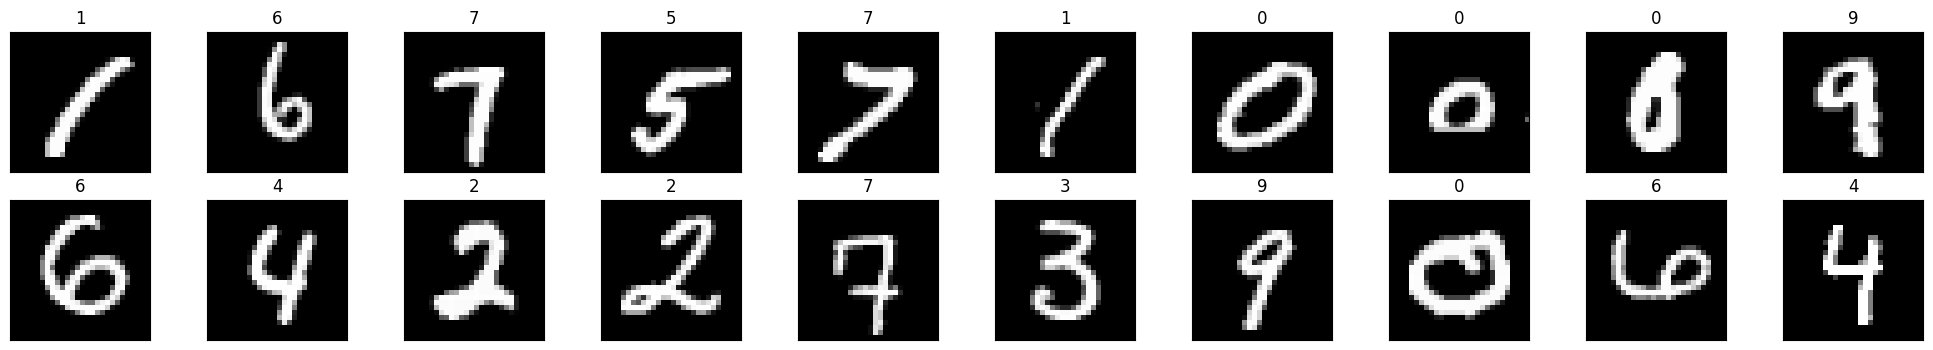

In [11]:
print("Some of the training samples and their labels : \n")

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2,int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

Pixel level View of one of the training sample 




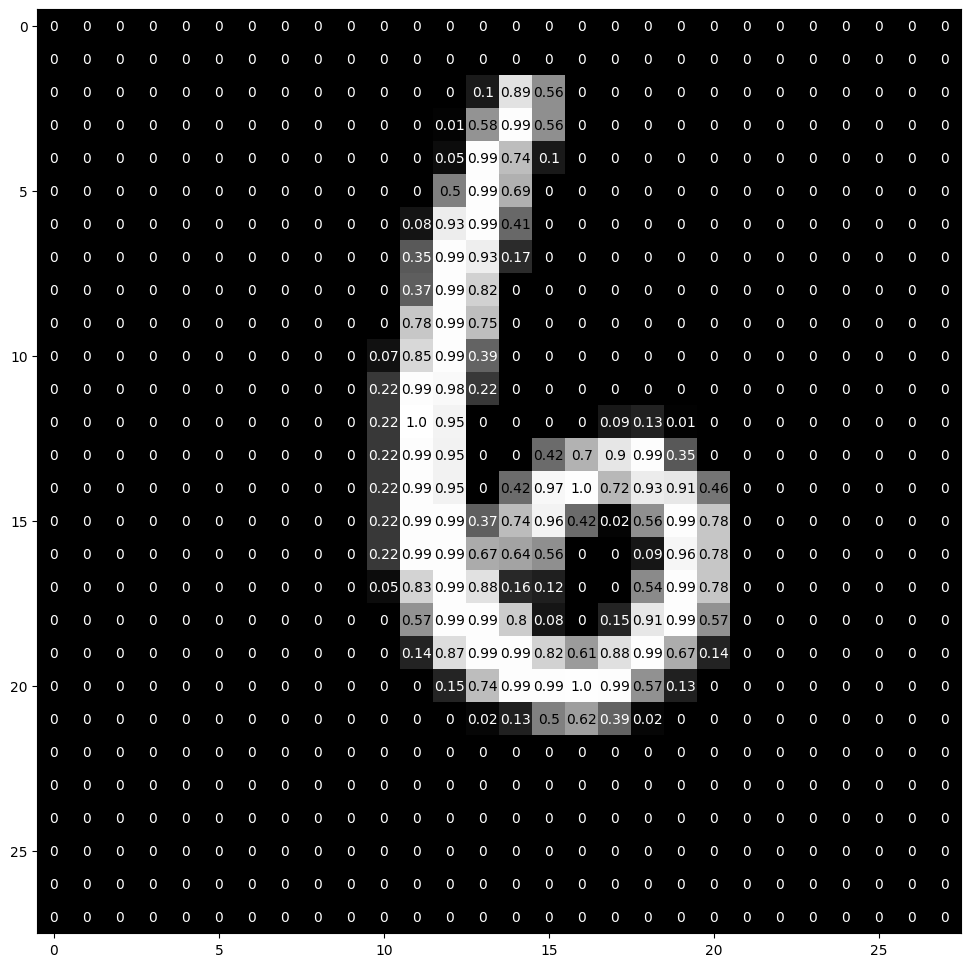

In [15]:
print ("Pixel level View of one of the training sample \n")
img = np.squeeze(images[1])
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

print()

In [17]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cpu')

# **Neural Network**

The neural network architecture defined above is a feedforward neural network with three fully connected (dense) layers. Here's a short description of the model:

Input Layer: The input layer consists of 784 neurons, corresponding to the flattened input image of size 28x28 pixels (784 = 28 * 28).

Hidden Layers:

The first hidden layer (fc1) has 512 neurons and applies a ReLU activation function. It processes the flattened input image to extract features.
The second hidden layer (fc2) also has 512 neurons and applies a ReLU activation function. It further refines the extracted features.
Output Layer:

The output layer (fc3) has 10 neurons, corresponding to the 10 classes (digits 0 through 9). It applies a ReLU activation function to produce the final output logits for each class.
Activation Function: The ReLU (Rectified Linear Unit) activation function is used after each hidden layer to introduce non-linearity into the model.

Forward Pass: The forward method defines the forward pass of the network. It flattens the input image, applies the fully connected layers (fc1, fc2, fc3) with ReLU activations, and returns the output logits.

Initialization: The network is initialized using the Net() constructor, and it is then moved to the specified device (e.g., GPU) for computation using .to(device).

Overall, this neural network architecture is designed for image classification tasks, such as recognizing handwritten digits in the MNIST dataset.








In [18]:
## Define the NN architecture

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 512)       # linear layer (n_hidden -> hidden_2)
        self.fc3 = nn.Linear(512, 10)        # linear layer (n_hidden -> 10)
        #self.dropout = nn.Dropout(0.2)       # dropout layer (p=0.2) # dropout prevents overfitting of data

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x)) # F.relu
        return x

# initialize the NN
model = Net().to(device)
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


In [19]:
!pip install torchsummary
from torchsummary import summary
summary(model, input_size = (1,784), batch_size = -1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         401,920
            Linear-2                  [-1, 512]         262,656
            Linear-3                   [-1, 10]           5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.55
Estimated Total Size (MB): 2.57
----------------------------------------------------------------


The code specifies the loss function and optimization algorithm to be used during training of the neural network.

Loss Function:

The loss function specified is nn.CrossEntropyLoss().
This loss function is commonly used for multi-class classification tasks.
It combines a softmax activation function and a negative log likelihood loss.
Optimization Algorithm:

The optimization algorithm specified is torch.optim.SGD.
It stands for Stochastic Gradient Descent, a widely used optimization algorithm for training neural networks.
It updates the parameters of the neural network in the direction that minimizes the loss function.
The learning rate (lr) is set to 0.01, which determines the step size of the parameter updates during optimization.
These components together define the training process for the neural network. The loss function computes the difference between the predicted output of the network and the true labels, while the optimization algorithm adjusts the parameters of the network to minimize this difference (i.e., minimize the loss).








In [20]:
## Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

print(criterion, optimizer)

CrossEntropyLoss() SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


# **Training NN model**

The code snippet provided trains the neural network model for a specified number of epochs (n_epochs) using the training data. Here's a short description of how it works:

1.Model Training Initialization:


>The model is set to training mode using model.train(), which sets the model in training mode and enables features like dropout.

>Inside the loop over epochs, variables train_loss and val_loss are initialized to track the cumulative training and validation losses, respectively.

2.Training Loop:

>Inside the outer loop over epochs, the code iterates over batches of training data using train_loader.
>For each batch, it moves the data and target labels to the device (e.g., GPU), clears the gradients of all optimized variables (optimizer.zero_grad()), performs a forward pass through the model to obtain predictions (output = model(data)), computes the loss between predictions and true labels (loss = criterion(output, target)), computes the gradients of the loss with respect to the model parameters (loss.backward()), and updates the model parameters using the optimizer (optimizer.step()).
>The training loss for the current batch is then calculated as the product of the loss value and the batch size (loss.item() * data.size(0)) and added to the running total train_loss.

3.Validation Loop:

>After completing the training loop for each epoch, the code iterates over batches of validation data using val_loader.
>Similar to the training loop, it computes the validation loss (val_loss) by iterating over batches of validation data and accumulating the loss for each batch.

4.Epoch-wise Output:

>After processing all batches for the current epoch, the average training loss (train_loss) and validation loss (val_loss) are calculated by dividing the running total loss by the total number of samples in the respective dataset (len(train_loader.dataset) and len(val_loader.dataset)).
>The training and validation losses for the current epoch are then printed out along with the epoch number.

5.End of Epoch:

>After completing all epochs, the training process is finished, and a message indicating completion is printed.
This code effectively trains the neural network model for the specified number of epochs, computing both the training and validation losses at the end of each epoch.








In [21]:
# number of epochs to train the model
n_epochs = 20  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):

    train_loss = 0.0                    # Initialize training, val loss
    val_loss=0.0

    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        data=data.to(device)
        target=target.to(device)
        optimizer.zero_grad()            # clear the gradients of all optimized variables
        output = model(data)             # forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(output, target) # calculate the loss
        loss.backward()                  # backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()                 # perform a single optimization step (parameter update)
        train_loss += loss.item()*data.size(0)  # update running training loss

    for data, target in val_loader:
        data=data.to(device)
        target=target.to(device)
        output = model(data)                  # forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(output, target)      # calculate the loss
        val_loss += loss.item()*data.size(0)  # update running training loss

    # print training statistics
    train_loss = train_loss/len(train_loader.dataset)  # calculate average loss over an epoch"""
    val_loss = val_loss/len(val_loader.dataset)        # Validation loss

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format( epoch+1, train_loss, val_loss ))
    print("Training is done\n")

Epoch: 1 	Training Loss: 1.124927 	Validation Loss: 0.608800
Training is done

Epoch: 2 	Training Loss: 0.534161 	Validation Loss: 0.516101
Training is done

Epoch: 3 	Training Loss: 0.471516 	Validation Loss: 0.470723
Training is done

Epoch: 4 	Training Loss: 0.431984 	Validation Loss: 0.438841
Training is done

Epoch: 5 	Training Loss: 0.402947 	Validation Loss: 0.415489
Training is done

Epoch: 6 	Training Loss: 0.380872 	Validation Loss: 0.397697
Training is done

Epoch: 7 	Training Loss: 0.363217 	Validation Loss: 0.383820
Training is done

Epoch: 8 	Training Loss: 0.348609 	Validation Loss: 0.372358
Training is done

Epoch: 9 	Training Loss: 0.336203 	Validation Loss: 0.362966
Training is done

Epoch: 10 	Training Loss: 0.325625 	Validation Loss: 0.355397
Training is done

Epoch: 11 	Training Loss: 0.316438 	Validation Loss: 0.349075
Training is done

Epoch: 12 	Training Loss: 0.308367 	Validation Loss: 0.343890
Training is done

Epoch: 13 	Training Loss: 0.301232 	Validation Lo

This code snippet evaluates the trained model on the test dataset and computes various evaluation metrics, including test loss and test accuracy.

Here's a short description of how it works:

1.Model Evaluation Initialization:

>The model is set to evaluation mode using model.eval(). This disables features like dropout, which are only active during training.

2.Testing Loop:

>The code iterates over batches of test data using test_loader.
>For each batch, it moves the data and target labels to the device (e.g., GPU), performs a forward pass through the model to obtain predictions (output = model(data)), computes the loss between predictions and true labels (loss = criterion(output, target)), and updates the test loss by adding the product of the loss value and the batch size (loss.item() * data.size(0)).
>It then calculates the predicted class for each sample in the batch (_, pred = torch.max(output, 1)) and compares the predictions to the true labels to compute the per-class accuracy.

3.Test Loss Calculation:

>After processing all batches, the average test loss (test_loss) is calculated by dividing the total test loss by the total number of samples in the test dataset (len(test_loader.dataset)).

4.Test Accuracy Calculation:

>For each class (digit 0 to 9), the test accuracy is calculated as the ratio of correctly predicted samples to the total number of samples belonging to that class.
The overall test accuracy is also calculated as the ratio of correctly predicted samples to the total number of samples in the test dataset.

5.Output:

>The test loss and test accuracy for each class, as well as the overall test accuracy, are printed out.
This code provides a comprehensive evaluation of the trained model's performance on the test dataset, including both overall accuracy and per-class accuracy metrics.








In [22]:
# Testing the  model
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    data=data.to(device)
    target=target.to(device)
    output = model(data)                            # forward pass: compute predicted outputs by passing inputs to the model
    loss = criterion(output, target)                # calculate the loss
    test_loss += loss.item()*data.size(0)           # update test loss
    _, pred = torch.max(output, 1)                  # convert output probabilities to predicted class
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))        # compare predictions to true label

    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))
print()

Test Loss: 0.300198

Test Accuracy of     0: 91% (897/980)
Test Accuracy of     1: 99% (1125/1135)
Test Accuracy of     2: 97% (1007/1032)
Test Accuracy of     3: 98% (994/1010)
Test Accuracy of     4: 96% (949/982)
Test Accuracy of     5: 97% (866/892)
Test Accuracy of     6: 97% (937/958)
Test Accuracy of     7: 97% (1002/1028)
Test Accuracy of     8: 97% (951/974)
Test Accuracy of     9: 97% (980/1009)

Test Accuracy (Overall): 97% (9708/10000)



Test Images and their predicted labels : 



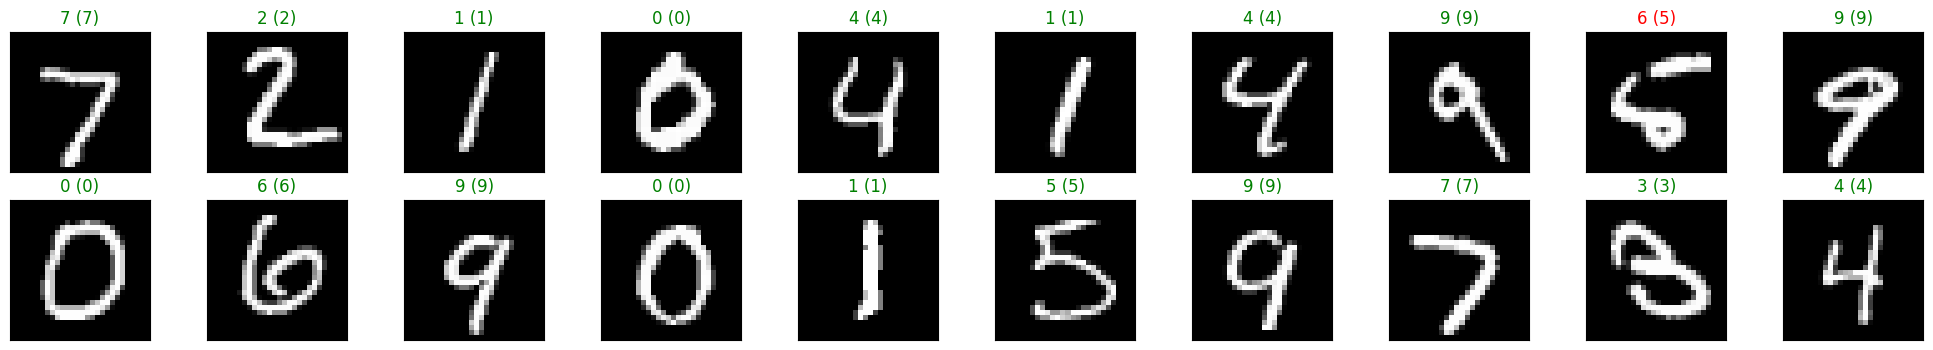

In [23]:
# obtain one batch of test images

print("Test Images and their predicted labels : \n")

dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# get sample outputs
output = model(images)

_, preds = torch.max(output, 1)  # convert output probabilities to predicted class
images = images.cpu()        # prep images for display

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))